K -En Yakın Komşu (KNN)


- Tahmninler gözlem benzerliğine göre yapılır.
- Komşu sayısını belirle(k)
- Bilinmeyen nokta ile diğer tüm noktalar ile arasındaki uzaklıkları hesapla
- Uzaklıkları sırala ve belirlenen k sayısına göre en yakın olan k gözlemi seç
- Sınıflandırma ise en yakın sınıf, regresyon ise ortalama değeri tahmin değeri olarak ver.


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

In [5]:
# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [6]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)

In [7]:
knn_model

KNeighborsRegressor()

In [8]:
knn_model.n_neighbors

5

In [9]:
y_pred = knn_model.predict(X_test)

In [10]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

In [11]:
RMSE = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train,y_pred))
    RMSE.append(rmse)
    print("k =",k,"için RMSE değeri:", rmse)
    

k = 1 için RMSE değeri: 0.0
k = 2 için RMSE değeri: 179.52761335480352
k = 3 için RMSE değeri: 205.20157172291863
k = 4 için RMSE değeri: 220.5139794876305
k = 5 için RMSE değeri: 239.6467132541376
k = 6 için RMSE değeri: 243.5904190007242
k = 7 için RMSE değeri: 258.1478781634636
k = 8 için RMSE değeri: 266.05374203349805
k = 9 için RMSE değeri: 269.73782093553376
k = 10 için RMSE değeri: 271.2798300436963


In [12]:
from sklearn.model_selection import GridSearchCV


In [13]:
knn_params = {'n_neighbors':np.arange(1,30,1)}

In [14]:
knn = KNeighborsRegressor()

In [15]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10)

In [16]:
knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [17]:
knn_cv_model.best_params_["n_neighbors"]

8

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
RMSE = []
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train,y_pred))
    rmse_cv = np.sqrt(-1 * cross_val_score(knn_model,X_train,y_train,cv=10,scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse)
    RMSE_CV.append(rmse_cv)
    print("k = ",k,"için RMSE değeri:",rmse,"RMSE_CV değeri:",rmse_cv)

k =  1 için RMSE değeri: 0.0 RMSE_CV değeri: 325.3947514706382
k =  2 için RMSE değeri: 179.52761335480352 RMSE_CV değeri: 293.24000183333817
k =  3 için RMSE değeri: 205.20157172291863 RMSE_CV değeri: 283.7486667487823
k =  4 için RMSE değeri: 220.5139794876305 RMSE_CV değeri: 286.3240222024089
k =  5 için RMSE değeri: 239.6467132541376 RMSE_CV değeri: 290.0705466132226
k =  6 için RMSE değeri: 243.5904190007242 RMSE_CV değeri: 298.1263115575851
k =  7 için RMSE değeri: 258.1478781634636 RMSE_CV değeri: 294.77070479194987
k =  8 için RMSE değeri: 266.05374203349805 RMSE_CV değeri: 291.98672028891235
k =  9 için RMSE değeri: 269.73782093553376 RMSE_CV değeri: 295.7162739573105
k =  10 için RMSE değeri: 271.2798300436963 RMSE_CV değeri: 301.31047022701154


In [19]:
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"])

In [20]:
knn_tuned.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [21]:
np.sqrt(mean_squared_error(y_test,knn_tuned.predict(X_test)))

413.7094731463598

DESTEK VEKTÖR REGRESYONU (SVR)

- Amaç ,bir marjin aralığına maksimum noktayı en küçük hata ile alabilicek şekilde doğru ya da eğriyi belirlemektir.
-

In [22]:
# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [23]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [24]:
from sklearn.svm import SVR

In [25]:
svr_model = SVR(kernel="linear").fit(X_train,y_train)

In [26]:
svr_model.predict(X_train)[0:10]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756, 666.91219512, 150.08292683, 304.13780488,
       507.88780488, 815.99756098])

In [27]:
print("y = {0} + {1} x".format(svr_model.intercept_[0],svr_model.coef_[0][0]))

y = -48.6975609756109 + 4.969512195121865 x


In [28]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [29]:
y_pred = svr_model.predict(X_train)

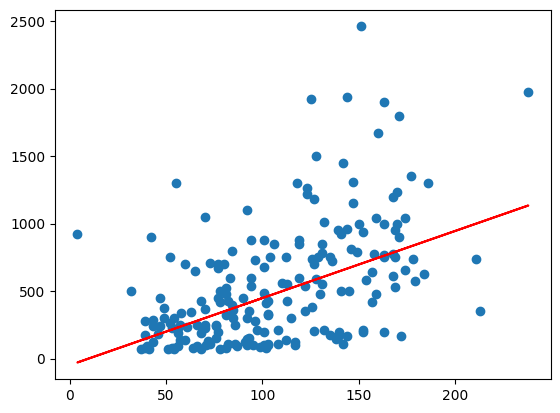

In [30]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred,color="r")

In [31]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train,y_train)
lm_pred = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_,lm_model.coef_[0]))

y = -8.8140954803348 + 5.172456135470689 x


Text(0, 0.5, 'Maaş(Salary)')

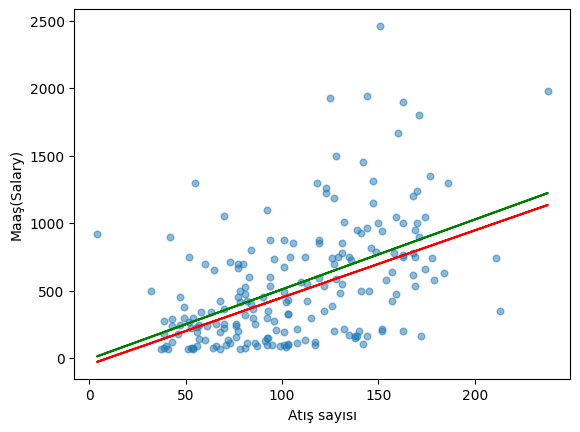

In [32]:
plt.scatter(X_train,y_train,alpha=0.5,s=23)
plt.plot(X_train,lm_pred,'g')
plt.plot(X_train,y_pred,color='r')
plt.xlabel("Atış sayısı")
plt.ylabel("Maaş(Salary)")

In [33]:
print("y = {0} + {1} x".format(svr_model.intercept_[0],svr_model.coef_[0][0]))

y = -48.6975609756109 + 4.969512195121865 x


In [34]:
svr_model.predict([[91]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([403.52804878])

In [35]:
y_pred = svr_model.predict(X_test)

In [36]:
np.sqrt(mean_squared_error(y_test,y_pred))

459.01879603651554

In [37]:
svr_model

SVR(kernel='linear')

In [38]:
import numpy as np

In [39]:
svr_params = {"C":np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=10).fit(X_train,y_train)

In [40]:
svr_cv_model.best_params_

{'C': 0.1}

In [41]:
svr_tuned = SVR(kernel="linear",C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

/var/folders/5f/h_sq9qfs1593m5tqmzlkhynm0000gn/T/ipykernel_93808/2053398304.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  svr_tuned = SVR(kernel="linear",C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)


In [42]:
y_pred = svr_tuned.predict(X_test)

In [43]:
np.sqrt(mean_squared_error(y_test,y_pred))

458.19896678111655

Doğrusal olmayan SVR



In [44]:
np.random.seed(3)

x_sim = np.random.uniform(2,10,145)
y_sim = np.sin(x_sim) + np.random.normal(0,0.4,145)

x_outliers = np.arange(2.5,5,0.5)
y_outliers = -5 * np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim,x_outliers]))
x_sim = np.concatenate([x_sim,x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim,y_outliers])[x_sim_idx]

In [46]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:,np.newaxis]),y_sim)
ols_pred = ols.predict(np.sin(x_sim[:,np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR(kernel='rbf',epsilon=eps)
svr.fit(x_sim[:,np.newaxis],y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])


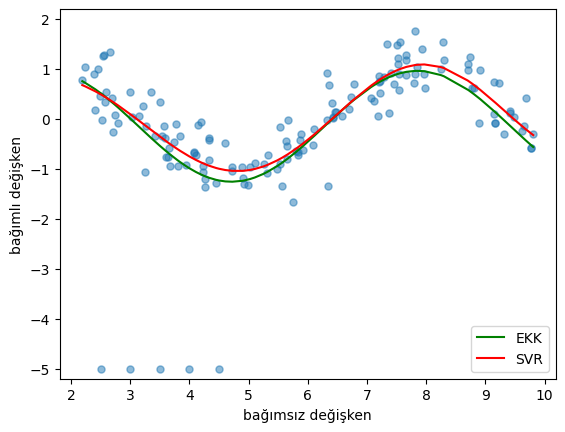

In [47]:
plt.scatter(x_sim,y_sim,alpha=0.5,s=26)
plt_ols, =plt.plot(x_sim,ols_pred,'g')
plt_svr, = plt.plot(x_sim,svr_pred,color='r')
plt.xlabel("bağımsız değişken")
plt.ylabel("bağımlı değişken")
plt.ylim(-5.2,2.2)
plt.legend([plt_ols,plt_svr],['EKK','SVR'],loc=4);


In [63]:
# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [64]:
svr_rbf = SVR(kernel="rbf").fit(X_train,y_train)

In [65]:
svr_rbf.predict(X_test)

array([467.17641555, 446.40313543, 478.61634896, 407.90736132,
       478.21333994, 417.12254646, 409.5369652 , 406.6833667 ,
       475.87387807, 472.35514043, 437.62371823, 470.87017269,
       475.61088446, 409.98015887, 417.76687494, 478.43331711,
       433.90433249, 405.3784308 , 449.34132456, 417.20961012,
       467.52126683, 429.7970886 , 429.27433039, 425.64037296,
       419.74184952, 403.04020294, 478.12867963, 419.46502593,
       467.98640388, 405.00840939, 404.35642525, 402.66487856,
       443.78645366, 412.97944034, 411.32083923, 478.8961275 ,
       471.79125748, 410.33130924, 403.32692238, 426.9544654 ,
       403.64557418, 404.74733617, 454.74782229, 433.10191289,
       478.70972915, 459.9497864 , 477.55417184, 405.01026337,
       408.92637939, 426.28903835, 472.7745124 , 446.66776352,
       441.59170843, 412.58392272, 406.04166734, 438.41225906,
       451.95520339, 476.94220443, 407.53571839, 475.58095683,
       472.51311483, 420.0614604 , 453.93699692, 421.10

In [66]:
y_pred =svr_rbf.predict(X_test)

In [67]:
np.sqrt(mean_squared_error(y_test,y_pred))

460.0032657244849

In [68]:
svr_rbf

SVR()

In [69]:
svr_params = {"C" : [0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params,cv=10)
svr_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [70]:
svr_cv_model.best_params_

{'C': 50}

In [71]:
pd.Series(svr_cv_model.best_params_)[0]

/var/folders/5f/h_sq9qfs1593m5tqmzlkhynm0000gn/T/ipykernel_93808/2988346359.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd.Series(svr_cv_model.best_params_)[0]


50

In [72]:
svr_tuned = SVR(kernel="rbf",C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

/var/folders/5f/h_sq9qfs1593m5tqmzlkhynm0000gn/T/ipykernel_93808/1508522608.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  svr_tuned = SVR(kernel="rbf",C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)


In [73]:
np.sqrt(mean_squared_error(y_test,y_pred))

460.0032657244849